# Web Scraping using Pandas and Beautifulasoup
# Ashutosh Mahajan

In [1]:
import requests #used to add contents like headers,files etc
from bs4 import BeautifulSoup

In [2]:
pageurl="https://simple.wikipedia.org/wiki/List_of_countries_by_continents" #getting contents of webpages
page1= requests.get(pageurl)   #getting contents of webpages
souping= BeautifulSoup(page1.content,'html.parser')


In [3]:
print(souping.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by continents - Simple English Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"214f88a2-0c21-4015-a832-6972671381f7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":7197088,"wgRevisionId":7197088,"wgArticleId":4810,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: empty unknown parameters","Articles needing additional

In [4]:
leaveout=['References','Antarctica','Other websites']     #get list of continents
continents=souping.findAll('span',{'class':'toctext'})
continents= [continent.text for continent in continents if continent.text not in leaveout]
print(continents)

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Australia/Oceania']


In [5]:
#finding all tags'li' with no 'class' and 'id'

htmlcountries=souping.findAll('ol')
countries_asper_continents=[countries.findAll('li',{'class':None, 'id':None }) for countries in htmlcountries if countries.findAll('li',{'class':None}) ]


In [6]:

countriesvscontinents=[]
for _countries in countries_asper_continents[:len(continents)]:
    countries=[]
    if _countries:
        for country in _countries:
            countries=[country.find('a').text for country in _countries if country.find('a')]
        countriesvscontinents.append(countries)
print(countriesvscontinents)

[['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'], ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives

In [7]:
import pandas as pd

In [8]:
col_CvsC=pd.DataFrame()
col_CvsC=pd.DataFrame(list(zip( continents,countriesvscontinents)),columns=['continent','countries']) 
print(col_CvsC)

           continent                                          countries
0             Africa  [Algeria, Angola, Benin, Botswana, Burkina Fas...
1               Asia  [Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...
2             Europe  [Albania, Andorra, Austria, Belarus, Belgium, ...
3      North America  [Antigua and Barbuda, Anguilla, Aruba, The Bah...
4      South America  [Argentina, Bolivia, Brazil, Chile, Colombia, ...
5  Australia/Oceania  [Australia, Federated States of Micronesia, Fi...


In [9]:
col_CvsC.to_csv('countries.csv')   #save DF

In [10]:
col_CvsC=col_CvsC.explode('countries').reset_index(drop=True)
print(col_CvsC)

             continent        countries
0               Africa          Algeria
1               Africa           Angola
2               Africa            Benin
3               Africa         Botswana
4               Africa     Burkina Faso
..                 ...              ...
221  Australia/Oceania            Samoa
222  Australia/Oceania  Solomon Islands
223  Australia/Oceania            Tonga
224  Australia/Oceania           Tuvalu
225  Australia/Oceania          Vanuatu

[226 rows x 2 columns]


# World happiness index 2019

In [11]:
d=pd.read_html("http://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")

In [12]:
df=d[6]
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


# Countries above median, identifiable by their index number

In [13]:
dfy=df["Score"].median() 
print(dfy)

5.378


In [14]:
df[df.gt(df.median(axis=0), axis=1)] #such countries can be identified by their index number,other irrelevant fields are Null

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,NaN,NaN,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,NaN,NaN,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,NaN,NaN,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,NaN,NaN,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,NaN,NaN,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,153.0,NaN,NaN,NaN,NaN,NaN,NaN,0.270,0.097
153,154.0,NaN,NaN,NaN,NaN,NaN,NaN,0.224,0.106
154,155.0,NaN,NaN,NaN,NaN,NaN,NaN,0.218,NaN


# Average of the world happiness 

In [15]:
dfx=df["Score"].mean() #Average of world happiness
print(dfx)

5.375916666666668


# Ten least happy countries

In [16]:
df.loc[146:155, :] # OR df.tail(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


# Distribution of happiness score per country

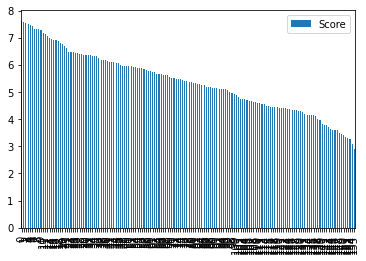

In [17]:
import matplotlib.pyplot as plt #happiness score distribution

axis=df[["Country or region","Score"]].plot(kind='bar',stacked=True)
fig = axis.get_figure()

plt.show()

# Plot of the correlation along with heatmap

In [18]:
import seaborn 


In [19]:
df=df[['Overall rank','Country or region','GDP per capita','Healthy life expectancy']] #selected fields for correlation
df

,Overall rank,Country or region,GDP per capita,Healthy life expectancy
0,1,Finland,1.305,0.874
1,2,Norway,1.456,0.861
2,3,Denmark,1.351,0.868
3,4,Iceland,1.343,0.914
4,5,Switzerland,1.420,0.927
...,...,...,...,...
151,152,Yemen,0.442,0.343
152,153,Tanzania,0.455,0.381
153,154,South Sudan,0.337,0.177
154,155,Central African Republic,0.024,0.010


In [20]:
df.corr()

,Overall rank,GDP per capita,Healthy life expectancy
Overall rank,1.000000,-0.805897,-0.778700
GDP per capita,-0.805897,1.000000,0.844273
Healthy life expectancy,-0.778700,0.844273,1.000000


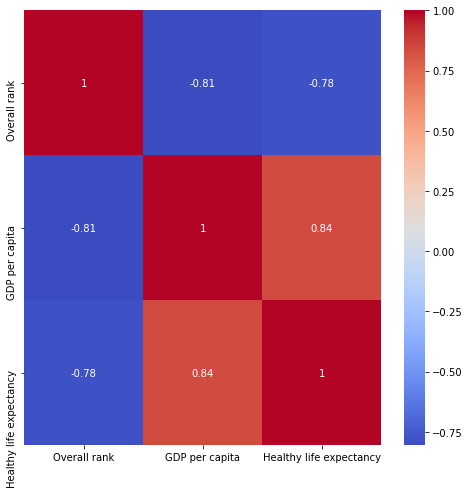

In [21]:
plt.figure(figsize=[8,8])
seaborn.heatmap(df.corr(), annot=True, cmap="coolwarm")